# Step 1

### Import cvs file

In [3]:
!pip install kaggle

In [4]:
outfile = open("kaggle.json","w")
outfile.write('{"username":"pengzhihuo","key":"b741699118093d72e40366cbb3cfb82a"}')
outfile.close()

In [5]:
!ls

kaggle.json  sample_data


In [6]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!ls /root/.kaggle

kaggle.json


In [8]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [9]:
api.dataset_download_file("amirmahdiabbootalebi/salary-by-job-title-and-country/data","Salary.csv")

True

In [10]:
!ls

Salary.csv  sample_data


In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
df = pd.read_csv("Salary.csv")

In [14]:
data = np.genfromtxt("Salary.csv", delimiter=',', skip_header=1)

 ### check datasets if its correct and match with csv file

In [15]:
data.shape

(6684, 9)

In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [17]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0
6683,26.0,Female,0,Sales Executive,1.0,35000.0,Canada,Black,0


# Step 2

###clean dataset that only contain China, US, Canada, Australia, and UK

In [18]:
# @title
#drop N/A data
df.dropna(axis=0,inplace=True)

In [19]:
# @title
#drop Duplicate data
df.drop_duplicates(inplace=True)

df.drop(columns=['Senior'],inplace=True)

df.drop(columns=['Race'],inplace=True)

display(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA
2,45.0,Male,3,Manager,15.0,150000.0,Canada
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA
4,52.0,Male,2,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China


In [20]:
# @title
print(df.dtypes)

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
dtype: object


In [21]:
# @title
# check Years of experience and age if inconsistent
inconsistent_data = df[df['Years of Experience']> df['Age']]

print(inconsistent_data)

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country]
Index: []


In [22]:
# @title
#drop negative salary if any
df.drop(inconsistent_data.index, inplace=True)

#to see if still have any
print(inconsistent_data)

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country]
Index: []


In [23]:
# @title
display(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA
2,45.0,Male,3,Manager,15.0,150000.0,Canada
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA
4,52.0,Male,2,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China


In [24]:
# @title
#check if any negative salary
negative_salary = df[df['Salary'] < 0]

print(negative_salary)

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country]
Index: []


In [25]:
# @title
#drop negative salary if any
df.drop(negative_salary.index, inplace=True)

#to see if still have any
print(negative_salary)

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country]
Index: []


In [26]:
display(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA
2,45.0,Male,3,Manager,15.0,150000.0,Canada
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA
4,52.0,Male,2,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China


In [27]:
# @title
countries_to_use = ['China', 'Canada', 'USA', 'Australia', 'UK']

origin_df = df
df = df[df['Country'].isin(countries_to_use)]

display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA
2,45.0,Male,3,Manager,15.0,150000.0,Canada
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA
4,52.0,Male,2,Director,20.0,200000.0,USA


In [28]:
display(df.tail())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China
6682,46.0,Male,2,Marketing Manager,14.0,140000.0,China


In [29]:
# @title
job_title_to_use = df[df["Job Title"].isin(["Data Analyst"])]

In [30]:
# @title
display(job_title_to_use)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA
81,41.0,Female,2,Data Analyst,13.0,80000.0,USA
138,36.0,Male,1,Data Analyst,7.0,60000.0,Australia
196,45.0,Male,3,Data Analyst,17.0,155000.0,UK
242,46.0,Male,3,Data Analyst,19.0,150000.0,UK
...,...,...,...,...,...,...,...
4784,28.0,Male,1,Data Analyst,3.0,52000.0,China
4804,28.0,Male,1,Data Analyst,3.0,52000.0,Australia
4814,28.0,Male,1,Data Analyst,3.0,52000.0,USA
4844,28.0,Male,1,Data Analyst,3.0,52000.0,USA


# **Step 3**

In this step, we chose data with the Job Title "Data Analyst" as our analysis objection.

We aim to get the relationships between various attributes of data analysts and 5 countries. And specially focus on salary's relationships with other attributes.

In [31]:
# @title
# Set the float format displayed in this notebook
pd.options.display.float_format = '{:,.2f}'.format

# Confirm which countries are used in the data frame
countries = np.array(job_title_to_use['Country'].unique())

## **For Age**

In [32]:
# @title Age Distribution in 5 Countries
ages = np.array(job_title_to_use['Age'])
ages_USA = np.array(job_title_to_use[job_title_to_use.Country=='USA']['Age'])
ages_Canada = np.array(job_title_to_use[job_title_to_use.Country=='Canada']['Age'])
ages_China = np.array(job_title_to_use[job_title_to_use.Country=='China']['Age'])
ages_Australia = np.array(job_title_to_use[job_title_to_use.Country=='Australia']['Age'])
ages_UK = np.array(job_title_to_use[job_title_to_use.Country=='UK']['Age'])

ages_df = pd.DataFrame([[ages_USA.max(),ages_USA.min(),ages_USA.ptp(),ages_USA.std(),ages_USA.mean(),np.sum(ages_USA<=ages_USA.mean()),np.sum(ages_USA>ages_USA.mean())],
                        [ages_Canada.max(),ages_Canada.min(),ages_Canada.ptp(),ages_Canada.std(),ages_Canada.mean(),np.sum(ages_Canada<=ages_Canada.mean()),np.sum(ages_Canada>ages_Canada.mean())],
                        [ages_China.max(),ages_China.min(),ages_China.ptp(),ages_China.std(),ages_China.mean(),np.sum(ages_China<=ages_China.mean()),np.sum(ages_China>ages_China.mean())],
                        [ages_Australia.max(),ages_Australia.min(),ages_Australia.ptp(),ages_Australia.std(),ages_Australia.mean(),np.sum(ages_Australia<=ages_Australia.mean()),np.sum(ages_Australia>ages_Australia.mean())],
                        [ages_UK.max(),ages_UK.min(),ages_UK.ptp(),ages_UK.std(),ages_UK.mean(),np.sum(ages_UK<=ages_UK.mean()),np.sum(ages_UK>ages_UK.mean())],
                        [ages.max(),ages.min(),ages.ptp(),ages.std(),ages.mean(),np.sum(ages<=ages.mean()),np.sum(ages>ages.mean())]],
                       columns=['Max','Min','Range','Standard deviation','Ave','# <= Ave','# > Ave'],\
                       index=['USA','Canada','China','Australia','UK','Total'])
# Display data frame
display(ages_df)

,Max,Min,Range,Standard deviation,Ave,# <= Ave,# > Ave
USA,41.00,23.00,18.00,4.20,29.19,32,26
Canada,37.00,23.00,14.00,4.18,28.44,25,20
China,37.00,23.00,14.00,4.05,28.41,28,21
Australia,37.00,24.00,13.00,3.91,28.66,26,21
UK,46.00,24.00,22.00,5.52,28.76,34,20
Total,46.00,23.00,23.00,4.45,28.72,143,110


## **For Education Level**

In [33]:
# @title Education Level Distribution in 5 Countries
edu = np.array(job_title_to_use['Education Level'])
edu_USA = np.array(job_title_to_use[job_title_to_use.Country=='USA']['Education Level'])
edu_Canada = np.array(job_title_to_use[job_title_to_use.Country=='Canada']['Education Level'])
edu_China = np.array(job_title_to_use[job_title_to_use.Country=='China']['Education Level'])
edu_Australia = np.array(job_title_to_use[job_title_to_use.Country=='Australia']['Education Level'])
edu_UK = np.array(job_title_to_use[job_title_to_use.Country=='UK']['Education Level'])

edu_df = pd.DataFrame([[edu_USA.max(),edu_USA.min(),edu_USA.ptp(),edu_USA.std(),edu_USA.mean(),np.sum(edu_USA<=edu_USA.mean()),np.sum(edu_USA>edu_USA.mean())],
                        [edu_Canada.max(),edu_Canada.min(),edu_Canada.ptp(),edu_Canada.std(),edu_Canada.mean(),np.sum(edu_Canada<=edu_Canada.mean()),np.sum(edu_Canada>edu_Canada.mean())],
                        [edu_China.max(),edu_China.min(),edu_China.ptp(),edu_China.std(),edu_China.mean(),np.sum(edu_China<=edu_China.mean()),np.sum(edu_China>edu_China.mean())],
                        [edu_Australia.max(),edu_Australia.min(),edu_Australia.ptp(),edu_Australia.std(),edu_Australia.mean(),np.sum(edu_Australia<=edu_Australia.mean()),np.sum(edu_Australia>edu_Australia.mean())],
                        [edu_UK.max(),edu.min(),edu_UK.ptp(),edu_UK.std(),edu_UK.mean(),np.sum(edu_UK<=edu_UK.mean()),np.sum(edu_UK>edu_UK.mean())],
                        [edu.max(),edu.min(),edu.ptp(),edu.std(),edu.mean(),np.sum(edu<=edu.mean()),np.sum(edu>edu.mean())]],
                       columns=['Max','Min','Range','Standard deviation','Ave','# <= Ave','# > Ave'],\
                       index=['USA','Canada','China','Australia','UK','Total'])
display(edu_df)

,Max,Min,Range,Standard deviation,Ave,# <= Ave,# > Ave
USA,2,1,1,0.41,1.21,46,12
Canada,2,1,1,0.38,1.18,37,8
China,2,1,1,0.40,1.20,39,10
Australia,2,1,1,0.38,1.17,39,8
UK,3,1,2,0.56,1.28,42,12
Total,3,1,2,0.44,1.21,203,50


## **For Years of Experience**

In [34]:
# @title Years of Experience Distribution in 5 Countries
years = np.array(job_title_to_use['Years of Experience'])
years_USA = np.array(job_title_to_use[job_title_to_use.Country=='USA']['Years of Experience'])
years_Canada = np.array(job_title_to_use[job_title_to_use.Country=='Canada']['Years of Experience'])
years_China = np.array(job_title_to_use[job_title_to_use.Country=='China']['Years of Experience'])
years_Australia = np.array(job_title_to_use[job_title_to_use.Country=='Australia']['Years of Experience'])
years_UK = np.array(job_title_to_use[job_title_to_use.Country=='UK']['Years of Experience'])

years_df = pd.DataFrame([[years_USA.max(),years_USA.min(),years_USA.ptp(),years_USA.std(),years_USA.mean(),np.sum(years_USA<=years_USA.mean()),np.sum(years_USA>years_USA.mean())],
                        [years_Canada.max(),years_Canada.min(),years_Canada.ptp(),years_Canada.std(),years_Canada.mean(),np.sum(years_Canada<=years_Canada.mean()),np.sum(years_Canada>years_Canada.mean())],
                        [years_China.max(),years_China.min(),years_China.ptp(),years_China.std(),years_China.mean(),np.sum(years_China<=years_China.mean()),np.sum(years_China>years_China.mean())],
                        [years_Australia.max(),years_Australia.min(),years_Australia.ptp(),years_Australia.std(),years_Australia.mean(),np.sum(years_Australia<=years_Australia.mean()),np.sum(years_Australia>years_Australia.mean())],
                        [years_UK.max(),years_UK.min(),years_UK.ptp(),years_UK.std(),years_UK.mean(),np.sum(years_UK<=years_UK.mean()),np.sum(years_UK>years_UK.mean())],
                        [years.max(),years.min(),years.ptp(),years.std(),years.mean(),np.sum(years<=years.mean()),np.sum(years>years.mean())]],
                       columns=['Max','Min','Range','Standard deviation','Ave','# <= Ave','# > Ave'],\
                       index=['USA','Canada','China','Australia','UK','Total'])
display(years_df)

,Max,Min,Range,Standard deviation,Ave,# <= Ave,# > Ave
USA,13.00,1.00,12.00,3.26,5.19,35,23
Canada,11.00,1.00,10.00,3.34,4.82,24,21
China,11.00,1.00,10.00,3.27,4.57,27,22
Australia,11.00,1.00,10.00,3.06,4.79,25,22
UK,19.00,1.00,18.00,4.34,4.91,34,20
Total,19.00,1.00,18.00,3.50,4.87,138,115


## **For Salary**

In [35]:
# @title Average Salary by Age
age_salary_df = pd.DataFrame(job_title_to_use.groupby(by='Age')['Salary'].mean())
display(age_salary_df)

,Salary
Age,
23.00,"91,750.00"
24.00,"92,481.48"
25.00,"105,204.08"
26.00,"121,714.29"
27.00,"87,222.22"
28.00,"53,300.00"
29.00,"128,461.54"
30.00,"148,823.53"
31.00,"193,000.00"


In [36]:
# @title Average Salary by Years of Experience
year_salary_df = pd.DataFrame(job_title_to_use.groupby(by='Years of Experience')['Salary'].mean())
display(year_salary_df)

,Salary
Years of Experience,
1.00,"93,875.00"
2.00,"97,166.67"
3.00,"107,130.43"
5.00,"142,826.09"
6.00,"120,000.00"
7.00,"121,545.45"
8.00,"101,176.47"
9.00,"165,536.59"
11.00,"159,230.77"


In [37]:
# @title Average Salary by Education Level
edu_salary_df = pd.DataFrame(job_title_to_use.groupby(by='Education Level')['Salary'].mean())
display(edu_salary_df)

,Salary
Education Level,
1,"121,975.37"
2,"106,382.98"
3,"155,000.00"


In [38]:
# @title Average Salary in Different Countries (Sorted in Descending Order)
country_salary_df = pd.DataFrame(job_title_to_use.groupby(by='Country')['Salary'].mean().sort_values(ascending=False))
display(country_salary_df)

,Salary
Country,
UK,"120,500.00"
Canada,"119,977.78"
USA,"119,706.90"
Australia,"119,382.98"
China,"117,673.47"


In [39]:
# @title Average Salary by Gender
gender_salary_df = pd.DataFrame(job_title_to_use.groupby(by='Gender')['Salary'].mean().sort_values(ascending=False))
display(gender_salary_df)

,Salary
Gender,
Male,"122,427.67"
Female,"114,468.09"


In [40]:
# @title Average and Standard Deviation of Salaries by Gender in Different Countries
contry_gender_salary_ave_df = pd.DataFrame(job_title_to_use.groupby(by=['Country','Gender'])['Salary'].mean().sort_index())
contry_gender_salary_ave_df.rename(columns={'Salary':'Salary Ave'}, inplace=True)
contry_gender_salary_std_df = pd.DataFrame(job_title_to_use.groupby(by=['Country','Gender'])['Salary'].std().sort_index())
contry_gender_salary_std_df.rename(columns={'Salary':'Salary Std'}, inplace=True)
contry_gender_salary_df = pd.concat([contry_gender_salary_ave_df,contry_gender_salary_std_df['Salary Std']], axis=1)
display(contry_gender_salary_df)

# Difference of average salary between genders
gender_diff = {}
for c in countries:
  gender_diff.update({c:abs(contry_gender_salary_ave_df.loc[c,'Male'].values[0] - contry_gender_salary_ave_df.loc[c,'Female'].values[0])})
min_diff = min(gender_diff, key=gender_diff.get)
max_diff = max(gender_diff, key=gender_diff.get)

print("\nNote:",
      f"\n{min_diff} is the countries with the smallest average salary gap, which is {gender_diff[min_diff]:,.2f} dollars, between male and female.",
      f"\n{max_diff} is the countries with the largest average salary gap, which is {gender_diff[max_diff]:,.2f} dollars, between male and female.")

# Difference in salary level
min_std = min(contry_gender_salary_std_df['Salary Std'])
min_std_i = np.where(contry_gender_salary_std_df['Salary Std']==min_std)
max_std = max(contry_gender_salary_std_df['Salary Std'])
max_std_i = np.where(contry_gender_salary_std_df['Salary Std']==max_std)

print("\nBy salary standard deviation we can know: ",
      f"\n{contry_gender_salary_std_df.index[min_std_i][0][1]} in {contry_gender_salary_std_df.index[min_std_i][0][0]} has minimal difference in salary levels.",
      f"\n{contry_gender_salary_std_df.index[max_std_i][0][1]} in {contry_gender_salary_std_df.index[max_std_i][0][0]} has maximal difference in salary levels.")

Salary Ave  Salary Std
Country   Gender                        
Australia Female  118,055.56   17,416.94
          Male    120,206.90   42,029.22
Canada    Female  115,882.35   15,735.64
          Male    122,464.29   44,809.46
China     Female  117,500.00   17,085.43
          Male    117,774.19   42,427.75
UK        Female  107,894.74   10,316.62
          Male    127,342.86   39,093.36
USA       Female  113,636.36   22,210.13
          Male    123,416.67   46,000.23


Note: 
China is the countries with the smallest average salary gap, which is 274.19 dollars, between male and female. 
UK is the countries with the largest average salary gap, which is 19,448.12 dollars, between male and female.

By salary standard deviation we can know:  
Female in UK has minimal difference in salary levels. 
Male in USA has maximal difference in salary levels.


# Step 4

### For Age:

In [41]:
# @title Age Distribution in different countries (box plot)
import matplotlib.pyplot as plt

ages_Australia = np.array(job_title_to_use[job_title_to_use.Country=='Australia']['Age'])
ages_Canada = np.array(job_title_to_use[job_title_to_use.Country=='Canada']['Age'])
ages_China = np.array(job_title_to_use[job_title_to_use.Country=='China']['Age'])
ages_UK = np.array(job_title_to_use[job_title_to_use.Country=='UK']['Age'])
ages_USA = np.array(job_title_to_use[job_title_to_use.Country=='USA']['Age'])

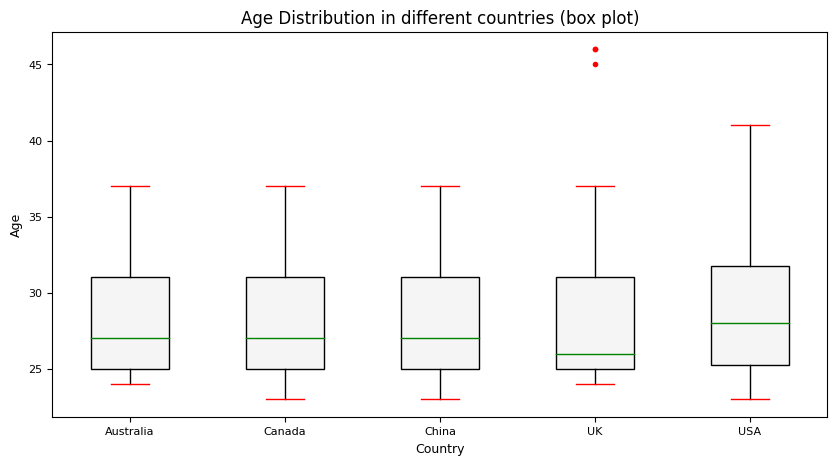

In [42]:
# @title
data_0 = [ages_Australia, ages_Canada, ages_China, ages_UK, ages_USA]

fig0 = plt.figure(figsize = (10,5))
ax0 = fig0.add_subplot(1,1,1)

ax0.boxplot(data_0, labels = ['Australia', 'Canada', 'China', 'UK', 'USA'],
            patch_artist=True,
            boxprops=dict(facecolor='whitesmoke'),
            capprops=dict(color='red'),
            medianprops=dict(color='green'),
            flierprops=dict(marker='.', markerfacecolor='red', markeredgecolor='red'))
ax0.set_title('Age Distribution in different countries (box plot)', fontsize = 12)
ax0.set_xlabel('Country', fontsize = 9)
ax0.set_ylabel('Age', fontsize = 9)
ax0.tick_params(axis = 'both', labelsize = 8)

Note:
* The UK showed two outliers. Excluding these two, the maximum age of data analysts in the UK is similar to Australia, Canada, and China (around 37 years old).
* In the USA, data analysts tend to be older, with the maximum age exceeding 40.



In [43]:
# @title Age Distribution in different countries (histogram 1)
import seaborn as sns

Country_name = ['Australia', 'Canada', 'China', 'UK', 'USA']

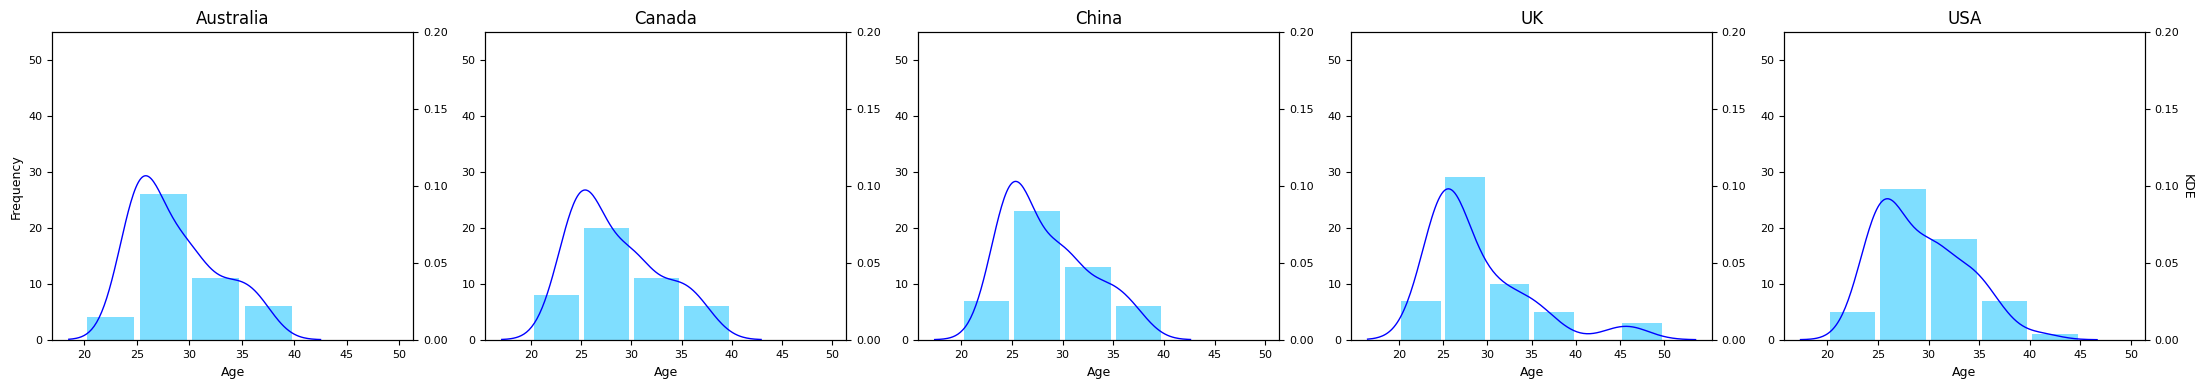

In [44]:
# @title
fig1, ax1 = plt.subplots(1, 5, figsize = (27,4))

for i in range(len(data_0)):
    ax = ax1[i]

    n, bins, patches = ax.hist(data_0[i], bins = 6,
                                 range = (20, 50),
                                alpha = 0.5,
                                color = 'deepskyblue',
                                rwidth = 0.9)

    ax.set_title(f'{Country_name[i]}', fontsize = 12)
    ax.set_xlabel('Age', fontsize = 9)
    if i == 0:
        ax.set_ylabel('Frequency', fontsize = 9)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.set_ylim(0, 55)
    ax.set_xticks(bins)

    axb = ax.twinx()

    sns.kdeplot(data_0[i], ax = axb, color = 'blue', linewidth = 1)

    axb.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    if i == 4:
        axb.set_ylabel('KDE', fontsize = 9, rotation = 270, labelpad = 10)
    else:
        axb.set_ylabel('')
    axb.tick_params(axis = 'both', labelsize = 8)


Note:
* For all five countries, the age distribution is right-skewed, indicating a prevalence of younger data analysts.
* This histogram reinforced that the majority fall within the 25-30 age range.



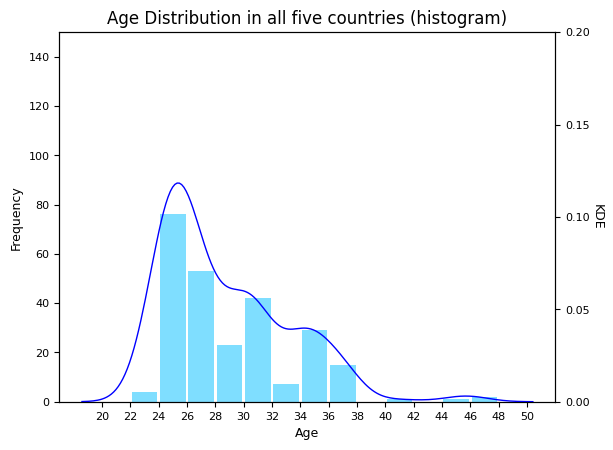

In [45]:
# @title Age Distribution in different countries (histogram 2)
fig2, ax2 = plt.subplots()

min_age = min(job_title_to_use['Age'])
max_age = max(job_title_to_use['Age'])

n, bins, patches = ax2.hist(job_title_to_use['Age'], bins = 15,
                             range = (min_age//5*5, (max_age//5+1)*5),
                            alpha = 0.5,
                            color = 'deepskyblue',
                            rwidth = 0.9)

ax2.set_title('Age Distribution in all five countries (histogram)', fontsize = 12)
ax2.set_xlabel('Age', fontsize = 9)
ax2.set_ylabel('Frequency', fontsize = 9)
ax2.tick_params(axis = 'both', labelsize = 8)
ax2.set_ylim(0, 150)
ax2.set_xticks(bins)

ax2b = ax2.twinx()

sns.kdeplot(job_title_to_use['Age'], ax = ax2b, color = 'blue', linewidth = 1)

ax2b.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax2b.set_ylabel('KDE', fontsize = 9, rotation = 270, labelpad = 10)
ax2b.tick_params(axis = 'both', labelsize = 8)

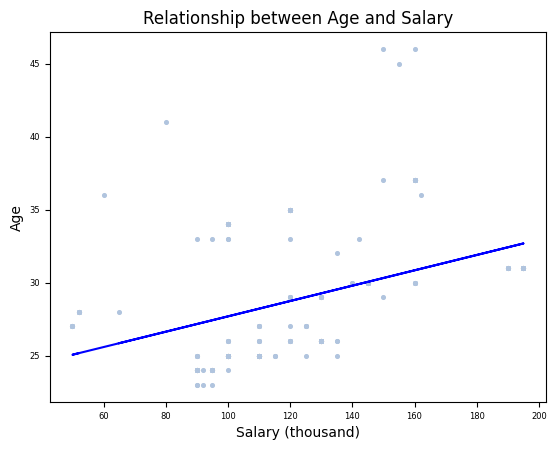

In [46]:
# @title Relationship between Age and Salary
from sklearn.linear_model import LinearRegression

fig3, ax3 = plt.subplots()

y1 = np.array(job_title_to_use['Age'])
x1 = np.array(job_title_to_use['Salary']/1000)

ax3.scatter(x1, y1, color = 'lightsteelblue', s = 7)
ax3.set_xlabel('Salary (thousand)', fontsize = 10)
ax3.set_ylabel('Age', fontsize = 10)
ax3.tick_params(axis = 'both', labelsize = 6)
ax3.set_title('Relationship between Age and Salary')

model1 = LinearRegression()
model1.fit(np.array(x1).reshape(-1, 1), y1)
ax3.plot(x1, model1.predict(np.array(x1).reshape(-1, 1)), color = 'blue')

In [47]:
# correlation coefficient
job_title_to_use['Age'].corr(job_title_to_use['Salary'])

0.4181134390332695

Note:
* Exploring the relationship between age and salary through linear regression and correlation coefficients showed a slight positive relationship as correlation coefficients (r) is 0.42, between 0.3 to 0.7.

### For Years of Experience

In [48]:
# @title Years of Experience Distribution in different countries (box plot)
exp_Australia = np.array(job_title_to_use[job_title_to_use.Country=='Australia']['Years of Experience'])
exp_Canada = np.array(job_title_to_use[job_title_to_use.Country=='Canada']['Years of Experience'])
exp_China = np.array(job_title_to_use[job_title_to_use.Country=='China']['Years of Experience'])
exp_UK = np.array(job_title_to_use[job_title_to_use.Country=='UK']['Years of Experience'])
exp_USA = np.array(job_title_to_use[job_title_to_use.Country=='USA']['Years of Experience'])

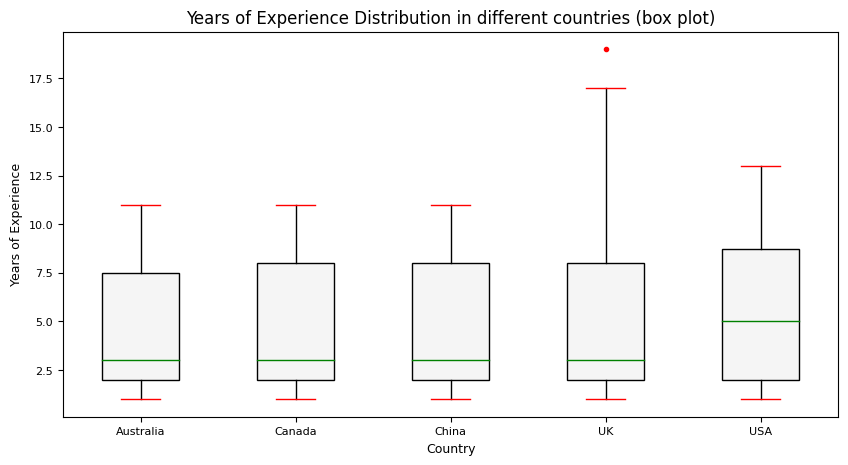

In [49]:
# @title
data_1 = [exp_Australia, exp_Canada, exp_China, exp_UK, exp_USA]

fig4 = plt.figure(figsize = (10,5))
ax4 = fig4.add_subplot(1,1,1)

ax4.boxplot(data_1, labels = ['Australia', 'Canada', 'China', 'UK', 'USA'],
            patch_artist=True,
            boxprops=dict(facecolor='whitesmoke'),
            capprops=dict(color='red'),
            medianprops=dict(color='green'),
            flierprops=dict(marker='.', markerfacecolor='red', markeredgecolor='red'))
ax4.set_title('Years of Experience Distribution in different countries (box plot)', fontsize = 12)
ax4.set_xlabel('Country', fontsize = 9)
ax4.set_ylabel('Years of Experience', fontsize = 9)
ax4.tick_params(axis = 'both', labelsize = 8)

Note:
* The UK showed an outlier with the highest maximum work experience (over 17 years).
* Excluding the UK, the maximum work experience for data analysts in the other four countries ranged from 11 to 13 years.

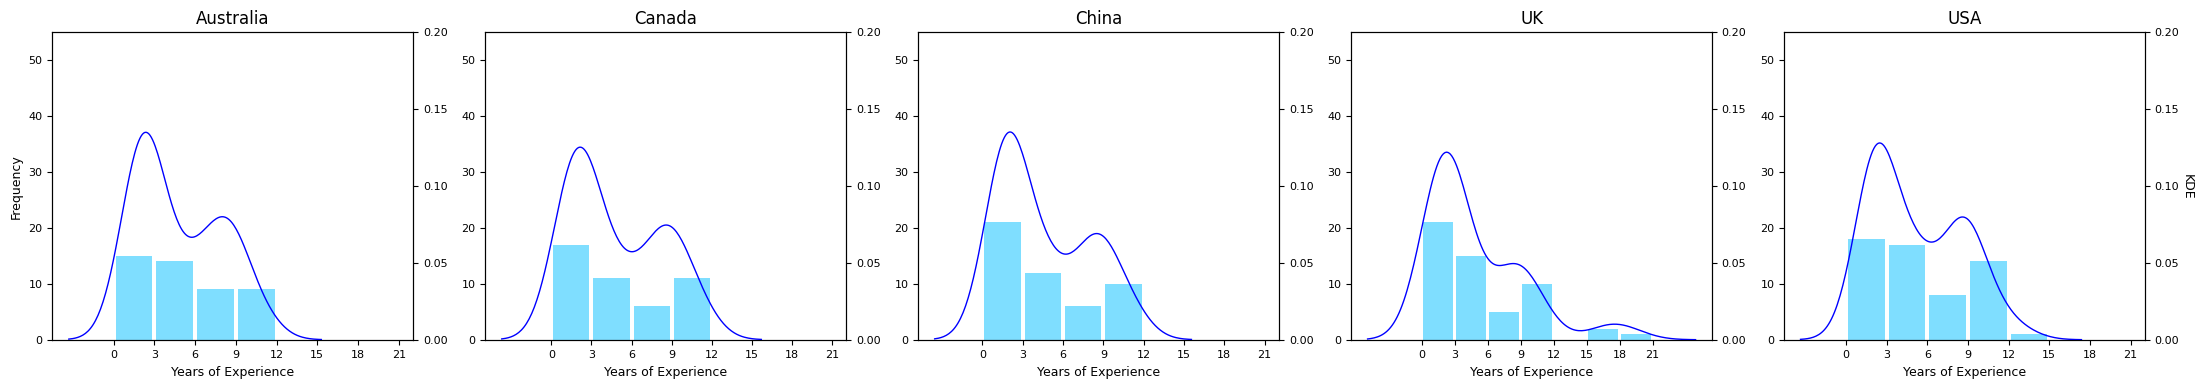

In [50]:
# @title Years of Experience Distribution in different countries (histogram 1)
fig5, ax5 = plt.subplots(1, 5, figsize = (27,4))

for i in range(len(data_1)):
    ax = ax5[i]

    n, bins, patches = ax.hist(data_1[i], bins = 7,
                                 range = (0, 21),
                                alpha = 0.5,
                                color = 'deepskyblue',
                                rwidth = 0.9)

    ax.set_title(f'{Country_name[i]}', fontsize = 12)
    ax.set_xlabel('Years of Experience', fontsize = 9)
    if i == 0:
        ax.set_ylabel('Frequency', fontsize = 9)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.set_ylim(0, 55)
    ax.set_xticks(bins)

    axb = ax.twinx()

    sns.kdeplot(data_1[i], ax = axb, color = 'blue', linewidth = 1)

    axb.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    if i == 4:
        axb.set_ylabel('KDE', fontsize = 9, rotation = 270, labelpad = 10)
    else:
        axb.set_ylabel('')
    axb.tick_params(axis = 'both', labelsize = 8)


Note:
* The years of work experience distribution is right-skewed, indicating a prevalence of relatively less experienced data analysts.
* Histograms revealed that most data analysts have less than 3 years of work experience.

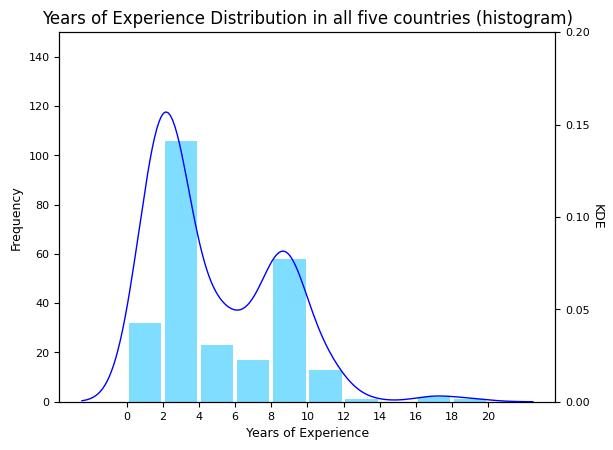

In [51]:
# @title Years of Experience Distribution in different countries (histogram 2)
fig6, ax6 = plt.subplots()

min_age = min(job_title_to_use['Years of Experience'])
max_age = max(job_title_to_use['Years of Experience'])

n, bins, patches = ax6.hist(job_title_to_use['Years of Experience'], bins = 10,
                             range = (min_age//5*5, (max_age//5+1)*5),
                            alpha = 0.5,
                            color = 'deepskyblue',
                            rwidth = 0.9)

ax6.set_title('Years of Experience Distribution in all five countries (histogram)', fontsize = 12)
ax6.set_xlabel('Years of Experience', fontsize = 9)
ax6.set_ylabel('Frequency', fontsize = 9)
ax6.tick_params(axis = 'both', labelsize = 8)
ax6.set_ylim(0, 150)
ax6.set_xticks(bins)

ax6b = ax6.twinx()

sns.kdeplot(job_title_to_use['Years of Experience'], ax = ax6b, color = 'blue', linewidth = 1)

ax6b.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax6b.set_ylabel('KDE', fontsize = 9, rotation = 270, labelpad = 10)
ax6b.tick_params(axis = 'both', labelsize = 8)

Note:
* Combining all countries, the majority falls within the 2-4 years of work experience categories.


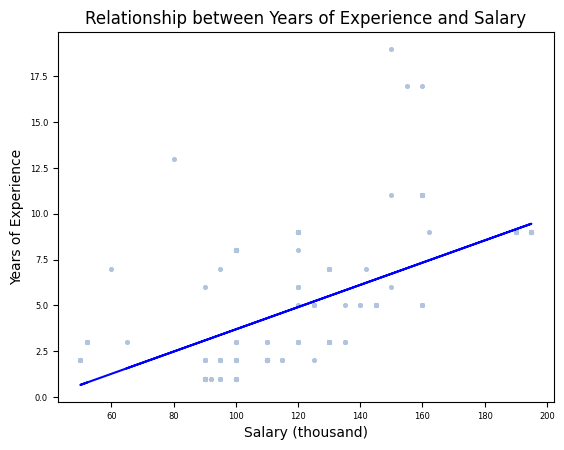

In [52]:
# @title Relationship between Years of Experience and Salary
fig7, ax7 = plt.subplots()
y2 = np.array(job_title_to_use['Years of Experience'])
x2 = np.array(job_title_to_use['Salary']/1000)

ax7.scatter(x2, y2, color = 'lightsteelblue', s = 7)
ax7.set_xlabel('Salary (thousand)', fontsize = 10)
ax7.set_ylabel('Years of Experience', fontsize = 10)
ax7.tick_params(axis = 'both', labelsize = 6)
ax7.set_title('Relationship between Years of Experience and Salary')

model2 = LinearRegression()
model2.fit(np.array(x2).reshape(-1, 1), y2)
ax7.plot(x2, model2.predict(np.array(x2).reshape(-1, 1)), color = 'blue')

In [53]:
# correlation coefficient
job_title_to_use['Years of Experience'].corr(job_title_to_use['Salary'])

0.6127666692033085

Note:
* Analyzing the connection between years of experience using linear regression and correlation coefficient showed a modest positive relationship with r = 0.61, stronger than the relationship between age and salary.



### For Education Level

In [54]:
# @title Education Level Ration in different countries
edu_Australia = np.array(job_title_to_use[job_title_to_use.Country=='Australia']['Education Level'])
edu_Canada = np.array(job_title_to_use[job_title_to_use.Country=='Canada']['Education Level'])
edu_China = np.array(job_title_to_use[job_title_to_use.Country=='China']['Education Level'])
edu_UK = np.array(job_title_to_use[job_title_to_use.Country=='UK']['Education Level'])
edu_USA = np.array(job_title_to_use[job_title_to_use.Country=='USA']['Education Level'])

In [55]:
# @title
edu_Australia = job_title_to_use[job_title_to_use.Country=='Australia'].groupby('Education Level').count()
temp = []
for i in range(len(edu_Australia.index)):
    temp.append(edu_Australia.iloc[i][1])
temp_sum = sum(temp)
edu_Australia_ratio = [x / temp_sum for x in temp]

edu_Canada = job_title_to_use[job_title_to_use.Country=='Canada'].groupby('Education Level').count()
temp = []
for i in range(len(edu_Canada.index)):
    temp.append(edu_Canada.iloc[i][1])
temp_sum = sum(temp)
edu_Canada_ratio = [x / temp_sum for x in temp]

edu_China = job_title_to_use[job_title_to_use.Country=='China'].groupby('Education Level').count()
temp = []
for i in range(len(edu_China.index)):
    temp.append(edu_China.iloc[i][1])
temp_sum = sum(temp)
edu_China_ratio = [x / temp_sum for x in temp]

edu_UK = job_title_to_use[job_title_to_use.Country=='UK'].groupby('Education Level').count()
temp = []
for i in range(len(edu_UK.index)):
    temp.append(edu_UK.iloc[i][1])
temp_sum = sum(temp)
edu_UK_ratio = [x / temp_sum for x in temp]

edu_USA = job_title_to_use[job_title_to_use.Country=='USA'].groupby('Education Level').count()
temp = []
for i in range(len(edu_USA.index)):
    temp.append(edu_USA.iloc[i][1])
temp_sum = sum(temp)
edu_USA_ratio = [x / temp_sum for x in temp]

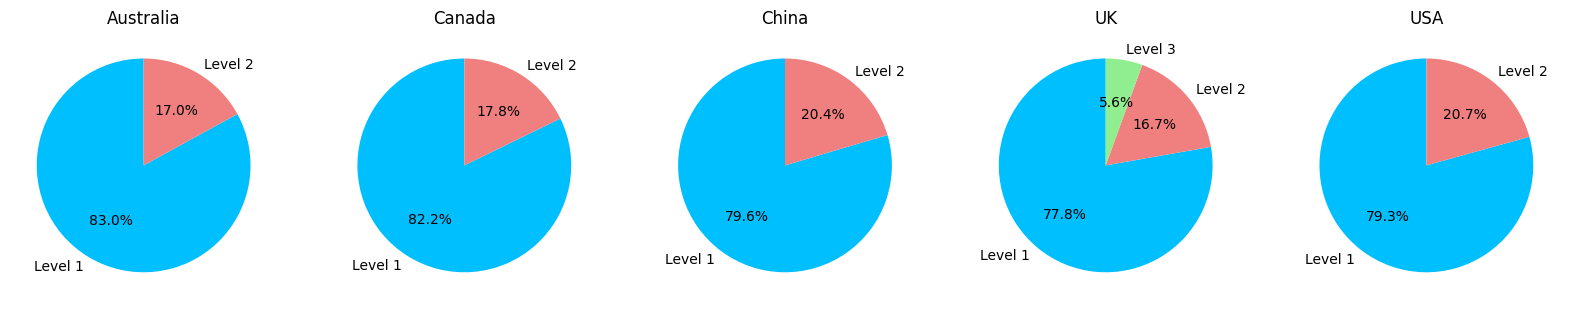

In [56]:
# @title
data_2 = [edu_Australia_ratio, edu_Canada_ratio, edu_China_ratio, edu_UK_ratio, edu_USA_ratio]

fig8, ax8 = plt.subplots(1, 5, figsize=(20, 4))

for i in range(len(data_2)):
    ax = ax8[i]
    if len(data_2[i]) == 3:
        ax.pie(data_2[i],
               labels = ['Level 1', 'Level 2', 'Level 3'],
               autopct ='%1.1f%%',
               startangle = 90,
               colors = ['deepskyblue', 'lightcoral', 'lightgreen'])

        ax.set_title(f'{Country_name[i]}', fontsize = 12)
    else:
        ax.pie(data_2[i],
               labels = ['Level 1', 'Level 2'],
               autopct ='%1.1f%%',
               startangle = 90,
               colors = ['deepskyblue', 'lightcoral'])

        ax.set_title(f'{Country_name[i]}', fontsize = 12)

Note:
* Only the UK had level three data analysts, indicating those with Ph.D.
* The majority across all countries held a level one education, representing a bachelor's degree.




In [57]:
# @title Education Level Proportion in all five countries
edu_all = job_title_to_use.groupby('Education Level').count()
temp = []
for i in range(len(edu_all.index)):
    temp.append(edu_all.iloc[i][1])
temp_sum = sum(temp)
edu_all_ratio = [x / temp_sum for x in temp]

Text(0.5, 1.0, 'Education Level Proportion in all five countries')

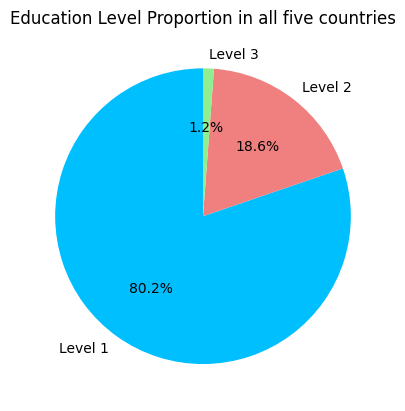

In [58]:
# @title
fig9, ax9 = plt.subplots()

ax9.pie(edu_all_ratio,
       labels = ['Level 1', 'Level 2', 'Level 3'],
       autopct ='%1.1f%%',
       startangle = 90,
       colors = ['deepskyblue', 'lightcoral', 'lightgreen'])

ax9.set_title('Education Level Proportion in all five countries', fontsize = 12)

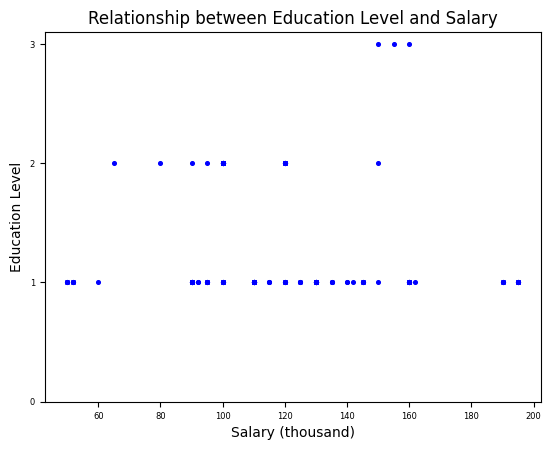

In [59]:
# @title Relationship between Education Level and Salary
fig10, ax10 = plt.subplots()
y3 = np.array(job_title_to_use['Education Level'])
x3 = np.array(job_title_to_use['Salary']/1000)

ax10.scatter(x3, y3, color = 'blue', s = 7)
ax10.set_xlabel('Salary (thousand)', fontsize = 10)
ax10.set_ylabel('Education Level', fontsize = 10)
ax10.tick_params(axis = 'both', labelsize = 6)
ax10.set_title('Relationship between Education Level and Salary')
ax10.set_yticks([0, 1, 2, 3])

Note:
* This graph depicting the relationship between education and salary showed that even with a level one education, salaries could be high.
* Conversely, having a level three education did not necessarily lead to higher salaries for data analysts, possibly due to a limited number of level three data points.




In conclusion, based on our dataset, we believe that the most influential factor affecting data analyst salaries is work experience, followed by age, with education level being a lesser contributing factor.

# Step 5

## Export the clean data to a database

In [60]:
import sqlite3

In [61]:
conn = sqlite3.connect('Group9.db')

In [62]:
job_title_to_use.to_sql('job_title_to_use', conn, index=False, if_exists='append')

253

In [63]:
pd.read_sql('select * from job_title_to_use',conn)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,28.00,Female,2,Data Analyst,3.00,"65,000.00",USA
1,41.00,Female,2,Data Analyst,13.00,"80,000.00",USA
2,36.00,Male,1,Data Analyst,7.00,"60,000.00",Australia
3,45.00,Male,3,Data Analyst,17.00,"155,000.00",UK
4,46.00,Male,3,Data Analyst,19.00,"150,000.00",UK
...,...,...,...,...,...,...,...
248,28.00,Male,1,Data Analyst,3.00,"52,000.00",China
249,28.00,Male,1,Data Analyst,3.00,"52,000.00",Australia
250,28.00,Male,1,Data Analyst,3.00,"52,000.00",USA
251,28.00,Male,1,Data Analyst,3.00,"52,000.00",USA
